# **Linear Regression**

Loading data...
Data shape:
X (features): (11, 1)
y (target): (11, 1)

Creating scatter plot...


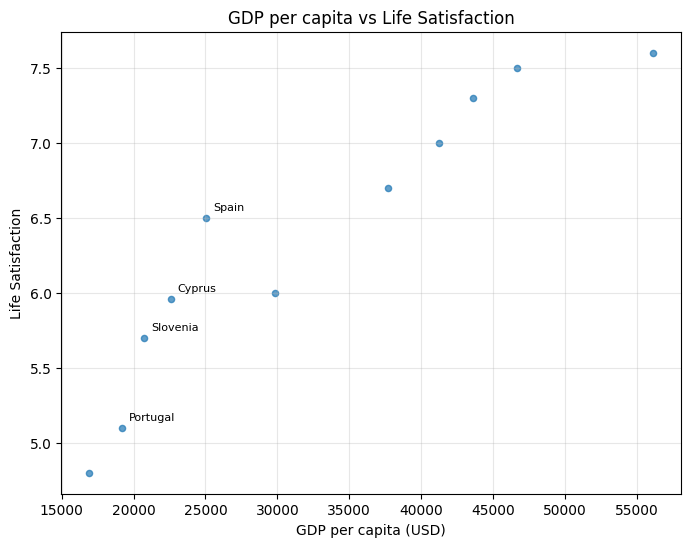


Training Linear Regression model...
Model coefficients: [6.80411132e-05]
Model intercept: 4.152909580923377

Prediction for Cyprus (GDP per capita: $22587): 5.69
Actual Life Satisfaction for Cyprus: 5.96


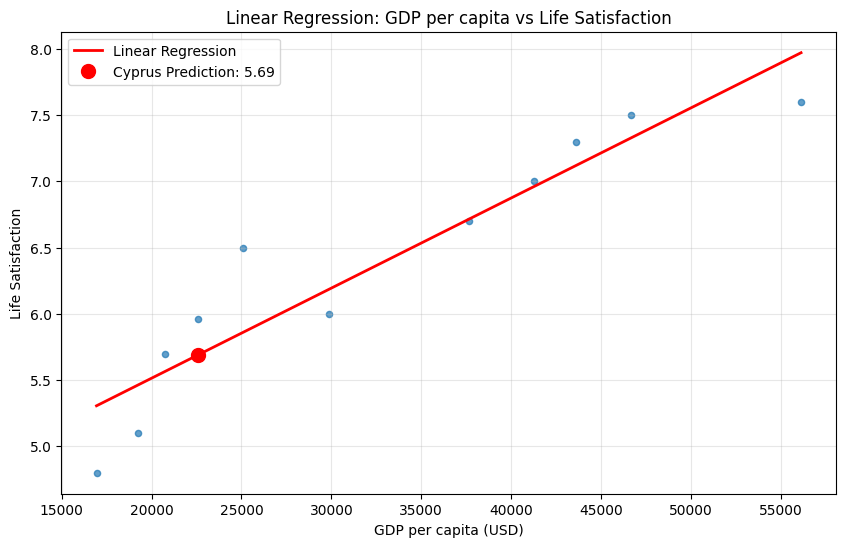


Model Performance:
Mean Squared Error: 0.1022
R² Score: 0.8752


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Fungsi untuk mempersiapkan data country statistics
    Menggabungkan data OECD BLI dan GDP per capita
    """
    # Merge kedua dataset berdasarkan country
    # Asumsi: kedua dataset memiliki kolom 'Country' untuk join
    oecd_bli = oecd_bli[oecd_bli["INDICATOR"] == "SW_LIFS"]  # Life satisfaction indicator
    oecd_bli = oecd_bli.pivot(index="Country", columns="INDICATOR", values="Value")

    # Rename kolom untuk konsistensi
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    # Merge datasets
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    # Rename kolom life satisfaction
    full_country_stats.rename(columns={"SW_LIFS": "Life satisfaction"}, inplace=True)

    return full_country_stats[["GDP per capita", "Life satisfaction"]].dropna()

# Load the data
print("Loading data...")
# Catatan: File CSV ini perlu tersedia di direktori kerja
# oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
# gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',',
#                             delimiter='\t', encoding='latin1', na_values="n/a")

# Untuk demonstrasi, kita buat data sintetis yang mirip dengan contoh
# Data ini berdasarkan contoh negara yang disebutkan dalam teks
sample_data = {
    'Country': ['Slovenia', 'Portugal', 'Spain', 'Cyprus', 'Greece', 'Italy',
                'France', 'Germany', 'Netherlands', 'Denmark', 'Switzerland'],
    'GDP per capita': [20732, 19222, 25063, 22587, 16937, 29867,
                      37675, 41267, 43603, 46682, 56118],
    'Life satisfaction': [5.7, 5.1, 6.5, 5.96, 4.8, 6.0,
                         6.7, 7.0, 7.3, 7.5, 7.6]
}

country_stats = pd.DataFrame(sample_data).set_index('Country')

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]  # Features (GDP per capita)
y = np.c_[country_stats["Life satisfaction"]]  # Target (Life satisfaction)

print("Data shape:")
print(f"X (features): {X.shape}")
print(f"y (target): {y.shape}")

# Visualize the data
print("\nCreating scatter plot...")
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                  figsize=(8, 6), alpha=0.7)
plt.title('GDP per capita vs Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.grid(True, alpha=0.3)

# Annotate beberapa negara penting
for country in ['Slovenia', 'Cyprus', 'Portugal', 'Spain']:
    if country in country_stats.index:
        row = country_stats.loc[country]
        plt.annotate(country, (row["GDP per capita"], row["Life satisfaction"]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.show()

# Select a linear model
print("\nTraining Linear Regression model...")
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

print(f"Model coefficients: {model.coef_[0]}")
print(f"Model intercept: {model.intercept_[0]}")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
prediction = model.predict(X_new)
print(f"\nPrediction for Cyprus (GDP per capita: ${X_new[0][0]}): {prediction[0][0]:.2f}")
print(f"Actual Life Satisfaction for Cyprus: {country_stats.loc['Cyprus', 'Life satisfaction']}")

# Visualize the linear regression line
plt.figure(figsize=(10, 6))
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                  alpha=0.7, ax=plt.gca())

# Plot regression line
X_range = np.linspace(country_stats["GDP per capita"].min(),
                     country_stats["GDP per capita"].max(), 100)
y_pred = model.predict(X_range.reshape(-1, 1))
plt.plot(X_range, y_pred, 'r-', linewidth=2, label='Linear Regression')

# Highlight Cyprus prediction
plt.plot(X_new[0], prediction[0], 'ro', markersize=10, label=f'Cyprus Prediction: {prediction[0][0]:.2f}')

plt.title('Linear Regression: GDP per capita vs Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

y_pred_all = model.predict(X)
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# **K-Nearest Neighbour**

Loading data...
Data shape:
X (features): (11, 1)
y (target): (11, 1)

Creating scatter plot...


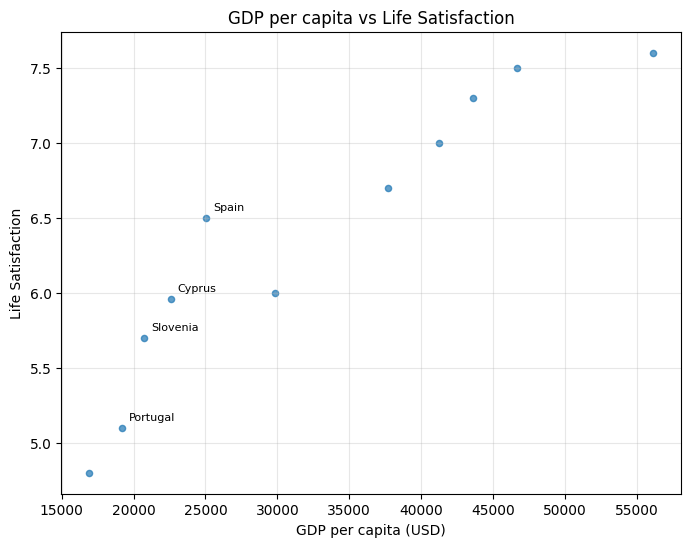


Training K-Nearest Neighbors Regression model...
Model type: K-Nearest Neighbors Regression with k=3

Prediction for Cyprus (GDP per capita: $22587): 6.05
Actual Life Satisfaction for Cyprus: 5.96

Nearest neighbors for Cyprus:
  1. Cyprus: GDP=$22587, Life Satisfaction=5.96, Distance=0.00
  2. Slovenia: GDP=$20732, Life Satisfaction=5.7, Distance=1855.00
  3. Spain: GDP=$25063, Life Satisfaction=6.5, Distance=2476.00


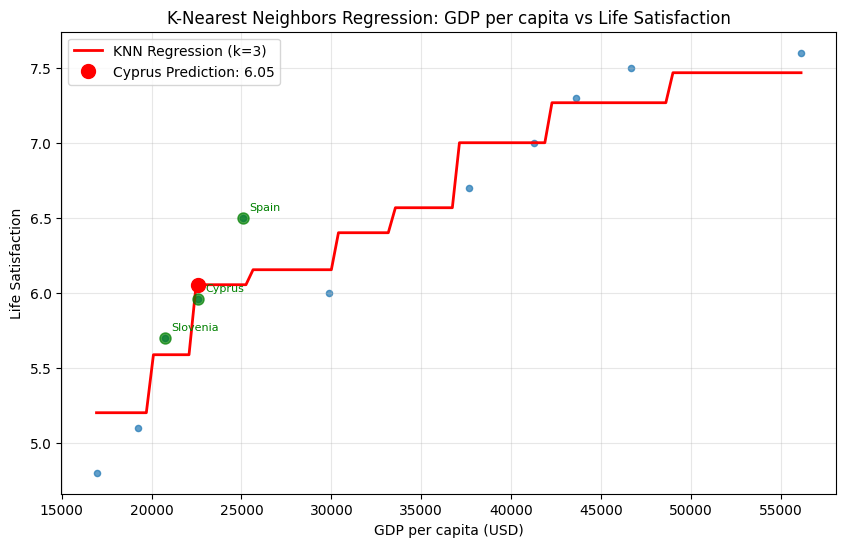


Model Performance:
Mean Squared Error: 0.0525
R² Score: 0.9358

Comparing different k values:
  k=1: MSE=0.0000, R²=1.0000, Cyprus prediction=5.96
  k=3: MSE=0.0525, R²=0.9358, Cyprus prediction=6.05
  k=5: MSE=0.1617, R²=0.8025, Cyprus prediction=5.61
  k=7: MSE=0.2685, R²=0.6722, Cyprus prediction=5.82


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Fungsi untuk mempersiapkan data country statistics
    Menggabungkan data OECD BLI dan GDP per capita
    """
    # Merge kedua dataset berdasarkan country
    # Asumsi: kedua dataset memiliki kolom 'Country' untuk join
    oecd_bli = oecd_bli[oecd_bli["INDICATOR"] == "SW_LIFS"]  # Life satisfaction indicator
    oecd_bli = oecd_bli.pivot(index="Country", columns="INDICATOR", values="Value")

    # Rename kolom untuk konsistensi
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    # Merge datasets
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    # Rename kolom life satisfaction
    full_country_stats.rename(columns={"SW_LIFS": "Life satisfaction"}, inplace=True)

    return full_country_stats[["GDP per capita", "Life satisfaction"]].dropna()

# Load the data
print("Loading data...")
# Catatan: File CSV ini perlu tersedia di direktori kerja
# oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
# gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',',
#                             delimiter='\t', encoding='latin1', na_values="n/a")

# Untuk demonstrasi, kita buat data sintetis yang mirip dengan contoh
# Data ini berdasarkan contoh negara yang disebutkan dalam teks
sample_data = {
    'Country': ['Slovenia', 'Portugal', 'Spain', 'Cyprus', 'Greece', 'Italy',
                'France', 'Germany', 'Netherlands', 'Denmark', 'Switzerland'],
    'GDP per capita': [20732, 19222, 25063, 22587, 16937, 29867,
                      37675, 41267, 43603, 46682, 56118],
    'Life satisfaction': [5.7, 5.1, 6.5, 5.96, 4.8, 6.0,
                         6.7, 7.0, 7.3, 7.5, 7.6]
}

country_stats = pd.DataFrame(sample_data).set_index('Country')

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]  # Features (GDP per capita)
y = np.c_[country_stats["Life satisfaction"]]  # Target (Life satisfaction)

print("Data shape:")
print(f"X (features): {X.shape}")
print(f"y (target): {y.shape}")

# Visualize the data
print("\nCreating scatter plot...")
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                  figsize=(8, 6), alpha=0.7)
plt.title('GDP per capita vs Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.grid(True, alpha=0.3)

# Annotate beberapa negara penting
for country in ['Slovenia', 'Cyprus', 'Portugal', 'Spain']:
    if country in country_stats.index:
        row = country_stats.loc[country]
        plt.annotate(country, (row["GDP per capita"], row["Life satisfaction"]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.show()

# Select a KNN model (changed from Linear Regression)
print("\nTraining K-Nearest Neighbors Regression model...")
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

print(f"Model type: K-Nearest Neighbors Regression with k={model.n_neighbors}")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
prediction = model.predict(X_new)
print(f"\nPrediction for Cyprus (GDP per capita: ${X_new[0][0]}): {prediction[0][0]:.2f}")
print(f"Actual Life Satisfaction for Cyprus: {country_stats.loc['Cyprus', 'Life satisfaction']}")

# Find the 3 nearest neighbors for Cyprus
distances, indices = model.kneighbors(X_new)
print(f"\nNearest neighbors for Cyprus:")
countries_list = list(country_stats.index)
for i, (dist, idx) in enumerate(zip(distances[0], indices[0])):
    neighbor_country = countries_list[idx]
    neighbor_gdp = country_stats.loc[neighbor_country, 'GDP per capita']
    neighbor_satisfaction = country_stats.loc[neighbor_country, 'Life satisfaction']
    print(f"  {i+1}. {neighbor_country}: GDP=${neighbor_gdp}, Life Satisfaction={neighbor_satisfaction}, Distance={dist:.2f}")

# Visualize the KNN regression
plt.figure(figsize=(10, 6))
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                  alpha=0.7, ax=plt.gca())

# Plot KNN prediction curve
X_range = np.linspace(country_stats["GDP per capita"].min(),
                     country_stats["GDP per capita"].max(), 100)
y_pred = model.predict(X_range.reshape(-1, 1))
plt.plot(X_range, y_pred, 'r-', linewidth=2, label='KNN Regression (k=3)')

# Highlight Cyprus prediction
plt.plot(X_new[0], prediction[0][0], 'ro', markersize=10, label=f'Cyprus Prediction: {prediction[0][0]:.2f}')

# Highlight the 3 nearest neighbors
for idx in indices[0]:
    neighbor_country = countries_list[idx]
    neighbor_gdp = country_stats.loc[neighbor_country, 'GDP per capita']
    neighbor_satisfaction = country_stats.loc[neighbor_country, 'Life satisfaction']
    plt.plot(neighbor_gdp, neighbor_satisfaction, 'go', markersize=8, alpha=0.7)
    plt.annotate(f'{neighbor_country}', (neighbor_gdp, neighbor_satisfaction),
                xytext=(5, 5), textcoords='offset points', fontsize=8, color='green')

plt.title('K-Nearest Neighbors Regression: GDP per capita vs Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

y_pred_all = model.predict(X)
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Compare different k values
print(f"\nComparing different k values:")
k_values = [1, 3, 5, 7]
for k in k_values:
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred_k = knn_model.predict(X)
    mse_k = mean_squared_error(y, y_pred_k)
    r2_k = r2_score(y, y_pred_k)
    cyprus_pred = knn_model.predict(X_new)
    print(f"  k={k}: MSE={mse_k:.4f}, R²={r2_k:.4f}, Cyprus prediction={cyprus_pred[0][0]:.2f}")